<a href="https://colab.research.google.com/github/pikey-msc/PythonBasico/blob/master/Curso_Python_Analysic_M7_M11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 7: Programación Orientada a Objetos (OOP u POO)





##Motivación
Para entender en qué se basa este paradigma (modelo de solución de problemas), en lugar de empezar con teoría propongo jugar un poco con dos códigos distintos. Ambos implementan una estructura de clientes y funciones para trabajar con ellos, pero uno está creado con programación estructurada (la clásica cuyas bases hemos estudiado hasta ahora) y la otra con programación orientada a objetos.

Lo único que tiene que hacer es probar ambos códigos (sin necesidad de analizarlos), luego sacan sus propias conclusiones de cual les parece más útil e intuitivo de aplicar y extender en el mundo real.

In [1]:
#Ejemplo Estructurado
# Definimos unos cuantos clientes
clientes= [
    {'Nombre': 'Hector', 'Apellidos':'Costa Guzman', 'dni':'11111111A'},
    {'Nombre': 'Juan', 'Apellidos':'González Márquez', 'dni':'22222222B'} 
]

# Creamos una función que muestra un cliente en una lista a partir del DNI
def mostrar_cliente(clientes, dni):
    for c in clientes:
        if (dni == c['dni']):
            print('{} {}'.format(c['Nombre'],c['Apellidos']))
            return
    print('Cliente no encontrado')

# Creamos una función que borra un cliente en una lista a partir del DNI
def borrar_cliente(clientes, dni):
    for i,c in enumerate(clientes):
        if (dni == c['dni']):
            del( clientes[i] )
            print(str(c),"> BORRADO")
            return

    print('Cliente no encontrado')    

### Fíjate muy bien cómo se utiliza el código estructurado

print("==LISTADO DE CLIENTES==")
print(clientes)

print("\n==MOSTRAR CLIENTES POR DNI==")
mostrar_cliente(clientes, '11111111A')
mostrar_cliente(clientes, '11111111Z')

print("\n==BORRAR CLIENTES POR DNI==")
borrar_cliente(clientes, '22222222V')
borrar_cliente(clientes, '22222222B')

print("\n==LISTADO DE CLIENTES==")
print(clientes)

==LISTADO DE CLIENTES==
[{'Nombre': 'Hector', 'Apellidos': 'Costa Guzman', 'dni': '11111111A'}, {'Nombre': 'Juan', 'Apellidos': 'González Márquez', 'dni': '22222222B'}]

==MOSTRAR CLIENTES POR DNI==
Hector Costa Guzman
Cliente no encontrado

==BORRAR CLIENTES POR DNI==
Cliente no encontrado
{'Nombre': 'Juan', 'Apellidos': 'González Márquez', 'dni': '22222222B'} > BORRADO

==LISTADO DE CLIENTES==
[{'Nombre': 'Hector', 'Apellidos': 'Costa Guzman', 'dni': '11111111A'}]


In [2]:
#Ejemplo orientado a objetos
### No intentes entender este código, sólo fíjate en cómo se utiliza abajo  

# Creo una estructura para los clientes
class Cliente:

    def __init__(self, dni, nombre, apellidos):
        self.dni = dni
        self.nombre = nombre
        self.apellidos = apellidos

    def __str__(self):
        return '{} {}'.format(self.nombre,self.apellidos)

# Y otra para las empresas
class Empresa:

    def __init__(self, clientes=[]):
        self.clientes = clientes

    def mostrar_cliente(self, dni=None):
        for c in self.clientes:
            if c.dni == dni:
                print(c)
                return
        print("Cliente no encontrado")

    def borrar_cliente(self, dni=None):
        for i,c in enumerate(self.clientes):
            if c.dni == dni:
                del(self.clientes[i])
                print(str(c),"> BORRADO")
                return
        print("Cliente no encontrado")

### Ahora utilizaré ambas estructuras 

# Creo un par de clientes
hector = Cliente(nombre="Hector", apellidos="Costa Guzman", dni="11111111A")
juan = Cliente("22222222B", "Juan", "Gonzalez Marquez")

# Creo una empresa con los clientes iniciales
empresa = Empresa(clientes=[hector, juan])

# Muestro todos los clientes
print("==LISTADO DE CLIENTES==")
print(empresa.clientes)

print("\n==MOSTRAR CLIENTES POR DNI==")
# Consulto clientes por DNI
empresa.mostrar_cliente("11111111A")
empresa.mostrar_cliente("11111111Z")

print("\n==BORRAR CLIENTES POR DNI==")
# Borro un cliente por DNI
empresa.borrar_cliente("22222222V")
empresa.borrar_cliente("22222222B")

# Muestro de nuevo todos los clientes
print("\n==LISTADO DE CLIENTES==")
print(empresa.clientes)

==LISTADO DE CLIENTES==
[<__main__.Cliente object at 0x7fa240301f28>, <__main__.Cliente object at 0x7fa240301fd0>]

==MOSTRAR CLIENTES POR DNI==
Hector Costa Guzman
Cliente no encontrado

==BORRAR CLIENTES POR DNI==
Cliente no encontrado
Juan Gonzalez Marquez > BORRADO

==LISTADO DE CLIENTES==


¿Les parece que el código orientado a objetos es más autoexplicativo a la hora de utilizarlo? 
 
Además con programación estructurada tenemos que enviar la lista que queremos consultar todo el rato, mientras que con la POO tenemos esas "estructuras" como la empresa que contienen los clientes, todo queda como más ordenado.

##Clases y objetos
La base de la POO son los objetos.

Pueden imaginar los objetos como un nuevo tipo de dato cuya definición viene dada en una estructura llamada clase.

Suelo hacer una metáfora y comparar las clases con moldes de galletas y los objetos con las galletas en sí mismas. Si bien todas las galletas que se hacen con el mismo molde tienen la misma forma, cada una adquiere atributos individuales después del horneado. Cosas como el color, la textura, el sabor... pueden llegar a ser muy distintas.

En otras palabras, las galletas comparten un proceso de fabricación y unos atributos, pero son independientes entre ellas y del propio molde y eso hace que cada una sea única.

Extrapolando el ejemplo, una clase es sólo un guión sobre como deben ser los objetos que se crearán con ella.

###```type()```
En Python todo son clases y objetos, eso se puede comprobar fácilmente pasando a la función type() cualquier variable o literal:

In [3]:
numero = 10
type(numero)

int

En el código anterior numero es una variable entera, pero si vamos más allá, en realidad es una instancia del tipo **int**, una clase muy básica de dato para almacenar números enteros.

Como curiosidad, incluso las funciones en Python son instancias del tipo function:

In [4]:
def hola():
    pass

type(hola)

function

###Definición de clase
La sintaxis es muy sencilla:

In [5]:
class Galleta:
    pass

Esta es una definición muy simple de lo que es una galleta, ya que con el pass la dejo vacía. Luego añadiremos más información, por ahora veamos como crear galletas con este molde.

### Instancias de clase
Para entender bien los objetos debemos tener claras dos cuestiones fundamentales:

**¿Cuándo y dónde existen los objetos?**

Puede parecer trivial, pero es importante tener claro que los objetos "existen" sólo durante la ejecución del programa y se almacenan en la memoria del sistema operativo.

Es decir, mientras las clases están ahí en el código haciendo su papel de instrucciones, los objetos no existen hasta que el programa se ejecuta y se crean en la memoria.

Este proceso de "crear" los objetos en la memoria se denomina instanciación y para realizarlo es tan fácil como llamar a la clase como si fuera una función:

In [6]:
una_galleta = Galleta()
otra_galleta = Galleta()

Demostrar que las galletas existen como "entes independientes" dentro de la memoria, es tan sencillo como imprimirlas por pantalla. \
Cada instancia tiene su propia referencia, demostrando que están en lugares distintos de la memoria. En cambio la clase no tiene una referencia porque es sólo un guión de instrucciones:

In [7]:
print(una_galleta)
print(otra_galleta)

print(Galleta)

<class '__main__.Galleta'>


Es posible consultar la clase de un objeto con la función type(), pero también se puede consultar a través de su atributo especial class:

In [8]:
print(Galleta)
print(type(una_galleta))
print(una_galleta.__class__)


<class '__main__.Galleta'>
<class '__main__.Galleta'>
<class '__main__.Galleta'>


A su vez las clases tienen un atributo especial name que nos devuelve su nombre en forma de cadena sin adornos:

In [9]:
print(Galleta.__name__)
print(type(una_galleta).__name__)
print(una_galleta.__class__.__name__)

Galleta
Galleta
Galleta


Resumiendo: los objetos son instancias de una clase.

## Atributos y métodos
Si hay algo que ilustre el potencial de la POO esa es la capacidad de definir variables y funciones dentro de las clases, aunque aquí se conocen como atributos y métodos respectivamente.

### Atributos
A efectos prácticos los atributos no son muy distintos de las variables, la diferencia fundamental es que sólo existen dentro del objeto.


#### Atributos dinámicos
Dado que Python es muy flexible los atributos pueden manejarse de distintas formas, por ejemplo se pueden crear dinámicamente (al vuelo) en los objetos

In [29]:
class Galleta:
    pass

galleta = Galleta()
galleta.sabor = "salado"
galleta.color = "marrón"
galleta.tamaño= "choncho"

print(f"El sabor de esta galleta es {galleta.sabor} "
      f"y el color {galleta.color}"
      f" y tamaño {galleta.tamaño}")

El sabor de esta galleta es salado y el color marrón y tamaño choncho


#### Atributos de clase
Aunque la flexibilidad de los atributos dinámicos puede llegar a ser muy útil, tener que definir los atributos de esa forma es tedioso. Es más práctico definir unos atributos básicos en la clase. De esa manera todas las galletas podrían tener unos atributos por defecto:

In [34]:
class Galleta:
    chocolate = False

galleta = Galleta() #asignación de clase a un objeto

if galleta.chocolate:
    print("La galleta tiene chocolate")
else:
    print("La galleta no tiene chocolate")

#Luego podemos cambiar su valor en cualquier momento
galleta.chocolate = True

if galleta.chocolate:
    print("La galleta tiene chocolate")
else:
    print("La galleta no tiene chocolate")    

La galleta no tiene chocolate
La galleta tiene chocolate


In [35]:
chokys=Galleta()
print(chokys.chocolate)

False


Por lo menos de esta forma nos aseguraremos de que el atributo chocolate existe en todas las galletas desde el principio. Además es posible consultar el valor por defecto que deben tener las galletas haciendo referencia al atributo en la definición de la clase:

In [31]:
print(Galleta.chocolate)

False


Lo curioso es que si cambiamos ese atributo de clase (que no de objeto) a *True*, las siguientes galletas se crearán con chocolate, es decir, habremos modificado las instrucciones de creación de los objetos:

In [32]:
class Galleta:
    chocolate = False

Galleta.chocolate = True

galleta = Galleta()

if galleta.chocolate:
    print("La galleta tiene chocolate")
else:
    print("La galleta no tiene chocolate")

La galleta tiene chocolate


In [33]:
cookie=Galleta()
print(cookie.chocolate)

True


###Métodos
Si por un lado tenemos las "variables" de las clases, por otro tenemos sus "funciones", que evidentemente nos permiten definir funcionalidades para llamarlas desde las instancias.

Definir un método es bastante simple, sólo tenemos que añadirlo en la clase y luego llamarlo desde el objeto con los paréntesis, como si de una función se trate:

In [36]:
class Galleta:
    chocolate = False

    def saludar():
        print("Hola, soy una galleta muy sabrosa")

galleta = Galleta()
galleta.saludar()

TypeError: ignored

Sin embargo, al intentar ejecutar el código anterior desde una galleta verán que no funciona. Nos indica que el método saludar() requiere 0 argumentos pero se está pasando uno.

¿Cómo puede ser? Si en ningún momento hemos enviado ninguna información a al galleta...

Lo que tenemos aquí, justo es la diferencia fundamental entre métodos de clase y métodos de instancia.

Prueben a ejecutar el método llamando a la clase en lugar del objeto:

In [37]:
class Galleta:
    chocolate = False

    def saludar():
        print("Hola, soy una galleta muy sabrosa")

Galleta.saludar()

Hola, soy una galleta muy sabrosa


¡Ahora sí ha funcionado! ¿Cómo es posible? Y más importante, ¿por qué al llamarlo desde el objeto dice que estamos enviando un argumento?

#### Primer argumento self
Los objetos tienen una característica muy importante: son conscientes de que existen. Y no, no es broma.

Cuando se ejecuta un método desde un objeto (que no desde una clase), se envía un primer argumento implícito que hace referencia al propio objeto. Si lo definimos en nuestro método podremos capturarlo y ver qué es:

In [46]:
class Galleta:
    chocolate = False

    def saludar(b):
        print("Hola, soy una galleta muy sabrosa")
        print(b)


galleta = Galleta()
print(galleta.saludar())




Hola, soy una galleta muy sabrosa
None


¿Curioso que haya funcionado verdad? Además ¿no les suena de algo ese resultado que muestra el parámetro que hemos definido? Se trata de la propia representación del objeto

In [47]:
class Galleta:
    chocolate = False

    def saludar(soy_el_propio_objeto):
        print("Hola, soy una galleta muy sabrosa")
        print(soy_el_propio_objeto)

galleta = Galleta()
galleta.saludar()
print(galleta)

Hola, soy una galleta muy sabrosa


Pues sí, podemos acceder al propio objeto desde el interior de sus métodos. Lo único que como este argumento hace referencia al objeto en sí mismo por convención se le llama self.

Poder acceder al propio objeto desde un método es muy útil, ya que nos permite acceder a sus atributos. Fíjense, el siguiente código no funcionaría como esperamos:

In [51]:
class Galleta:
    chocolate = False
    bread=False
    def chocolatear(a):
        chocolate = True
    def breading(b):
        bread=True

galleta = Galleta()
galleta.chocolatear()
print(galleta.chocolate)
galleta.breading()
print(galleta.bread)

False
False


En cambio, si hacemos ver que self es el propio objeto...

In [54]:
class Galleta:
    chocolate = False
    bread=False

    def chocolatear(self):
        self.chocolate = True
    def breading(self):
        self.bread=True


galleta = Galleta()
galleta.chocolatear()
print(galleta.chocolate)
galleta.breading()
print(galleta.bread)

True
True


¿No es interesante? Da la sensación como les decía antes de que las instancias tienen que saber quienes son porque sino no pueden acceder sus atributos internos y por eso tienen que enviarse asimismas a los métodos.

Sea como sea con este ejemplo podemos entender que por defecto el valor de un atributo se busca en la clase, pero para modificarlo en la instancia es necesario hacer referencia al objeto.

###Métodos especiales
Ahora que sabemos crear métodos y hemos aprendido para qué sirve el argumento self, es momento de introducir algunos métodos especiales de las clases.

Se llaman especiales porque la mayoría ya existen de forma oculta y sirven para tareas específicas.

####Constructor
El constructor es un método que se llama automáticamente al crear un objeto, se define con el nombre init:

In [55]:
class Galleta:

    def __init__(self):
        print("Soy una galleta acabada de hornear!")

galleta = Galleta()

Soy una galleta acabada de hornear!


La finalidad del constructor es, como su nombre indica, construir los objetos. Por esa razón permite sobreescribir el método que crea los objetos, permitiéndonos enviar datos desde el principio para construirlo:

In [62]:
class Galleta:
    chocolate = False

    def __init__(self, sabor, color):
        self.sabor = sabor
        self.color = color
        print(f"Se acaba de crear una galleta {self.color} y {self.sabor}.")

galleta_1 = Galleta("marrón", "amarga")
galleta_2 = Galleta("blanca", "dulce")


Se acaba de crear una galleta amarga y marrón.
Se acaba de crear una galleta dulce y blanca.


Como los métodos se comportan como funciones tienen sus mismas características, permitiéndonos definir valores nulos, valores por posición y nombre, argumentos indeterminadas, etc.
####Destructor
Si existe un constructor también debe existir un destructor que se llame al eliminar el objeto para que encargue de las tareas de limpieza como vaciar la memoria. Ese es el papel del método especial del. Es muy raro sobreescribir este método porque se maneja automáticamente, pero es interesante saber que existe.

Todos los objetos se borran automáticamente de la memoria al finalizar el programa, aunque también podemos eliminarlos automáticamente pasándolos a la función del():

In [69]:
class Galleta:

    def __del__(self):
        print("La galleta se está borrando de la memoria")

galleta = Galleta()


del(galleta)


La galleta se está borrando de la memoria


En este punto vale comentar algo respecto a los métodos especiales como éste, y es que pese a que tienen accesores en forma de función para facilitar su llamada, es totalmente posible ejecutarlos directamente como si fueran métodos normales:

In [74]:
class Galleta:

    def __del__(self):
        print("La galleta se está borrando de la memoria")

galleta = Galleta()

galleta.__del__()



La galleta se está borrando de la memoria
La galleta se está borrando de la memoria


Seguro trae a la mente funciones como ```str()``` y ```len()```, y es que en efecto, esas también son accesores de los métodos especiales ```str``` y ```len``` que tienen los objetos.
####String
El método str es el que devuelve la representación de un objeto en forma de cadena. Un momento en que se llama automáticamente es cuando imprimirmos una variable por pantalla.

Por defecto los objetos imprimen su clase y una dirección de memoria, pero eso puede cambiarse sobreescribiendo el comportamiento:

In [77]:
class Galleta:

    def __init__(self, sabor, color):
        self.sabor = sabor
        self.color = color

    def __str__(self):
       return f"Soy una galleta {self.color} y {self.sabor}."

galleta = Galleta("dulce", "blanca")

print(galleta)
print(str(galleta))
print(galleta.__str__())

Hay que tener en cuenta que este método debe devolver la cadena en lugar de mostrar algo por pantalla, ese es el funcionamiento que se espera de él.

####Length
Finalmente otro método especial interesante es el que devuelve la longitud. Normalmente está ligado a colecciones, pero nada impide definirlo en una clase. Y sí, digo definirlo y no redefinirlo porque por defecto no existe en los objetos aunque sea el que se ejecuta al pasarlos a la función len().

In [80]:
class Cancion:

    def __init__(self, autor, titulo, duracion):  # en segundos
        self.duracion = duracion

    def __len__(self):
       return self.duracion

cancion = Cancion("Death", "Leprosy", 210)

print(len(cancion))
print(cancion.__len__())

210
210


Mientras devolvamos un número, este método no debería dar problemas.

### Objetos dentro de objetos
Hasta ahora no lo hemos comentado, pero al ser las clases un nuevo tipo de dato resulta más que obvio que se pueden poner en colecciones e incluso utilizarlos dentro de otras clases.

Este es un pequeño código de ejemplo sobre un catálogo de películas para que lo estudien detenidamente:

In [82]:
class Pelicula:

    # Constructor de clase
    def __init__(self, titulo, duracion, lanzamiento):
        self.titulo = titulo
        self.duracion = duracion
        self.lanzamiento = lanzamiento
        print('Se ha creado la película:', self.titulo)

    def __str__(self):
        return '{} ({})'.format(self.titulo, self.lanzamiento)


class Catalogo:

    peliculas = []  # Esta lista contendrá objetos de la clase Pelicula

    def __init__(self, peliculas=[]):
        self.peliculas = peliculas

    def agregar(self, p):  # p será un objeto Pelicula
        self.peliculas.append(p)

    def mostrar(self):
        for p in self.peliculas:
            print(p)  # Print toma por defecto str(p)


p = Pelicula("El Padrino", 175, 1972)
c = Catalogo([p])  # Añado una lista con una película desde el principio
c.mostrar()
c.agregar(Pelicula("El Padrino: Parte 2", 202, 1974))  # Añadimos otra
c.mostrar()
c.agregar(Pelicula("Inception", 190, 2010))
c.mostrar()

Se ha creado la película: El Padrino
El Padrino (1972)
Se ha creado la película: El Padrino: Parte 2
El Padrino (1972)
El Padrino: Parte 2 (1974)
Se ha creado la película: Inception
El Padrino (1972)
El Padrino: Parte 2 (1974)
Inception (2010)


## *Inheritance* Herencia en la POO
La herencia es la capacidad que tiene una clase de heredar los atributos y métodos de otra, algo que nos permite reutilizar código y hacer programar mucho más óptimos.

Para ver su utilidad, en esta lección vamos a desarrollar un ejemplo. Partiremos de una clase sin herencia con muchos atributos y la iremos descomponiendo en otras clases más simples que nos permitan trabajar mejor con sus datos.


### Ejemplo sin herencia
Supongamos que se diseñará una estructura para una tienda que vende tres tipos de productos: adornos, alimentos y libros.

Todos los productos de la tienda tenían una serie de atributos comunes, como la referencia, el nombre, el pvp (precio venta al público)... pero algunos eran específicos de cada tipo.

Si partimos de una clase que contenga todos los atributos, quedaría más o menos así:

In [83]:
class Producto:
    def __init__(self, referencia, tipo, nombre, 
                 pvp,  descripcion, productor=None, 
                 distribuidor=None, isbn=None, autor=None):
        self.referencia = referencia
        self.tipo = tipo
        self.nombre = nombre
        self.pvp = pvp
        self.descripcion = descripcion
        self.productor = productor
        self.distribuidor = distribuidor
        self.isbn = isbn
        self.autor = autor


adorno = Producto('000A','ADORNO','Vaso Adornado',15,
                  'Vaso de porcelana con dibujos') 

print(adorno)
print(adorno.tipo) 

ADORNO


Obviamente esto es un despropósito, así que veamos como aproecharnos de la herencia para mejorar el planteamento.

###Superclases
Así pues la idea de la herencia es identificar una clase base (la superclase) con los atributos comunes y luego crear las demás clases heredando de ella (las subclases) extendiendo sus campos específicos. En nuestro caso esa clase sería el Producto en sí mismo:

In [93]:
class Producto:
    def __init__(self,referencia,nombre,pvp,descripcion):
        self.referencia = referencia
        self.nombre = nombre
        self.pvp = pvp
        self.descripcion = descripcion

    def __str__(self):
        return f"REFERENCIA\t {self.referencia}\n" \
               f"NOMBRE\t\t {self.nombre}\n" \
               f"PVP\t\t {self.pvp}\n" \
               f"DESCRIPCIÓN\t {self.descripcion}\n"

###Subclases
Para heredar los atributos y métodos de una clase en otra sólo tenemos que pasarla entre paréntesis durante la definición:

In [94]:
class Adorno(Producto):
    pass

adorno = Adorno(2034, "Vaso adornado", 15, "Vaso de porcelana")
print(adorno)

REFERENCIA	 2034
NOMBRE		 Vaso adornado
PVP		 15
DESCRIPCIÓN	 Vaso de porcelana



Como se puede apreciar es posible utilizar el comportamiento de una superclase sin definir nada en la subclase.

Respecto a las demás subclases como se añaden algunos atributos, podríamos definirlas de esta forma:

In [95]:
class Alimento(Producto):
    productor = ""
    distribuidor = ""

    def __str__(self):
        return f"REFERENCIA\t {self.referencia}\n" \
               f"NOMBRE\t\t {self.nombre}\n" \
               f"PVP\t\t {self.pvp}\n" \
               f"DESCRIPCIÓN\t {self.descripcion}\n" \
               f"PRODUCTOR\t\t {self.productor}\n" \
               f"DISTRIBUIDOR\t\t {self.distribuidor}\n"


class Libro(Producto):
    isbn = ""
    autor = ""

    def __str__(self):
        return f"REFERENCIA\t {self.referencia}\n" \
               f"NOMBRE\t\t {self.nombre}\n" \
               f"PVP\t\t {self.pvp}\n" \
               f"DESCRIPCIÓN\t {self.descripcion}\n" \
               f"ISBN\t\t {self.isbn}\n" \
               f"AUTOR\t\t {self.autor}\n"

Ahora para utilizarlas simplemente tendríamos que establecer los atributos después de crear los objetos:

In [96]:
alimento = Alimento(2035, "Botella de Aceite de Oliva", 5, "250 ML")
alimento.productor = "La Aceitera"
alimento.distribuidor = "Distribuciones SA"
print(alimento)

libro = Libro(2036, "Cocina Mediterránea",9, "Recetas sanas y buenas")
libro.isbn = "0-123456-78-9"
libro.autor = "Doña Juana"
print(libro)

REFERENCIA	 2035
NOMBRE		 Botella de Aceite de Oliva
PVP		 5
DESCRIPCIÓN	 250 ML
PRODUCTOR		 La Aceitera
DISTRIBUIDOR		 Distribuciones SA

REFERENCIA	 2036
NOMBRE		 Cocina Mediterránea
PVP		 9
DESCRIPCIÓN	 Recetas sanas y buenas
ISBN		 0-123456-78-9
AUTOR		 Doña Juana



### Trabajando en conjunto
Gracias a la flexibilidad de Python podemos manejar objetos de distintas clases masivamente de una forma muy simple.

Vamos a empezar creando una lista con nuestros tres productos de subclases distintas:

In [97]:
productos = [adorno, alimento]
productos.append(libro)

print(productos)

#Ahora si queremos recorrer todos los productos de la lista podemos usar un bucle for:
for producto in productos:
    print(producto, "\n")

#También podemos acceder a los atributos, siempre que sean compartidos entre todos los objetos:    

for producto in productos:
    print(producto.referencia, producto.nombre)

[<__main__.Adorno object at 0x7f3a704d5860>, <__main__.Alimento object at 0x7f3a7060e0f0>, <__main__.Libro object at 0x7f3a7060ee10>]
REFERENCIA	 2034
NOMBRE		 Vaso adornado
PVP		 15
DESCRIPCIÓN	 Vaso de porcelana
 

REFERENCIA	 2035
NOMBRE		 Botella de Aceite de Oliva
PVP		 5
DESCRIPCIÓN	 250 ML
PRODUCTOR		 La Aceitera
DISTRIBUIDOR		 Distribuciones SA
 

REFERENCIA	 2036
NOMBRE		 Cocina Mediterránea
PVP		 9
DESCRIPCIÓN	 Recetas sanas y buenas
ISBN		 0-123456-78-9
AUTOR		 Doña Juana
 

2034 Vaso adornado
2035 Botella de Aceite de Oliva
2036 Cocina Mediterránea


Si un objeto no tiene el atributo al que queremos acceder nos dará error:

In [98]:
for producto in productos:
    print(producto.autor)

AttributeError: ignored

Por suerte podemos hacer una comprobación con la función ```isinstance()``` para determinar si una instancia es de una determinado clase y así mostrar unos atributos u otros:

In [104]:
for producto in productos:
    if( isinstance(producto, Adorno) ):
        print(producto.referencia, producto.nombre)
    elif( isinstance(producto, Alimento) ):
        print(producto.referencia, producto.nombre, producto.productor)
    # elif( isinstance(producto, Libro) ):
    #     print(producto.referencia, producto.nombre, p.autor) 


print(libro)

2034 Vaso adornado
2035 Botella de Aceite de Oliva La Aceitera
REFERENCIA	 2036
NOMBRE		 Cocina Mediterránea
PVP		 9
DESCRIPCIÓN	 Recetas sanas y buenas
ISBN		 0-123456-78-9
AUTOR		 Doña Juana



###Polimorfismo
El polimorfismo es una propiedad de la herencia por la que objetos de distintas subclases pueden responder a una misma acción.

La polimorfia es implícita en Python, ya que todas las clases son subclases de una superclase común llamada **Object**.

Por ejemplo la siguiente función aplica una rebaja al precio de un producto:

In [106]:
def rebajar_producto(producto, rebaja):
    producto.pvp = producto.pvp - (producto.pvp/100 * rebaja)
    # producto.pvp=producto.pvp(1-rebaja/100)

Gracias al polimorfismo no tenemos que comprobar si un objeto tiene o no el atributo pvp, simplemente intentamos acceder y si existe premio:

In [109]:
print(alimento, "\n")
rebajar_producto(alimento, 10)
print(alimento)



REFERENCIA	 2035
NOMBRE		 Botella de Aceite de Oliva
PVP		 4.05
DESCRIPCIÓN	 250 ML
PRODUCTOR		 La Aceitera
DISTRIBUIDOR		 Distribuciones SA
 

REFERENCIA	 2035
NOMBRE		 Botella de Aceite de Oliva
PVP		 3.6449999999999996
DESCRIPCIÓN	 250 ML
PRODUCTOR		 La Aceitera
DISTRIBUIDOR		 Distribuciones SA



Por cierto, como pueden ver en el ejemplo, cuando modificamos un atributo de un objeto dentro de una función éste cambia en la instancia. 

### Copia de Objetos
De la misma forma que las colecciones, los objetos se pasan a las funciones por referencia. Si modificamos sus valores dentro, éstos se verán reflejados fuera.

Esto también afecta a la hora de hacer copias, creándose en su lugar un acceso al objeto en lugar de uno nuevo con sus valores:

In [114]:
class Test:
    pass

test1 = Test()
test2 = test1

test2.algo = "Prueba"

print(test2 == test1)  # ¿Son el mismo objeto?

print(test1.algo)
print(test2.algo)

True
Prueba
Prueba


Para realizar una copia a partir de sus valores podemos utilizar la función copy del módulo con el mismo nombre:

In [117]:
from copy import copy

class Test:
    pass

test1 = Test()
test2 = copy(test1)

test1.algo = "Prueba"

print(test2 == test1)  # ¿Son el mismo objeto?

print(test1.algo)


False
Prueba


La función copy se puede utilizar también para copiar colecciones:

In [118]:
from copy import copy

lista1 = [1,2,3]
lista2 = copy(lista1)
lista1 = None

print(lista1)
print(lista2)

None
[1, 2, 3]


### Herencia múltiple
Finalmente hablemos de la herencia múltiple: la capacidad de una subclase de heredar de múltiples superclases.

Esto conlleva un problema, y es que si varias superclases tienen los mismos atributos o métodos, la subclase sólo podrá heredar de una de ellas.

En estos casos Python dará prioridad a las clases más a la izquierda en el momento de la declaración de la subclase:

In [122]:
class A:
    def __init__(d):
        print("Soy de clase A")
    def a(d):
        print("Este método lo heredo de A")

class B:
    def __init__(d):
        print("Soy de clase B")
    def b(d):
        print("Este método lo heredo de B")
    def a(b):
        print("Este método lo heredo de BA")

class C(B,A):
    def c(c):
        print("Este método es de C")


c = C()
c.a()
c.b()
c.c()

Soy de clase B
Este método lo heredo de BA
Este método lo heredo de B
Este método es de C


##Ejercicio 1

En este ejercicio vas a trabajar el concepto de puntos, coordenadas y vectores sobre el plano cartesiano y cómo la programación Orientada a Objetos puede ser una excelente aliada para trabajar con ellos. No está pensado para que hagas ningún tipo de cálculo sino para que practiques la automatización de tareas

**Repaso plano cartesiano**
### El plano cartesiano
Representa un espacio bidimensional (en 2 dimensiones), formado por dos rectas perpendiculares, una horizontal y otra vertical que se cortan en un punto. La recta horizontal se denomina eje de las abscisas o eje X, mientras que la vertical recibe el nombre de eje de las ordenadas o simplemente eje Y. En cuanto al punto donde se cortan, se conoce como el punto de origen O.
Es importante remarcar que el plano se divide en 4 cuadrantes:

<img width="300" height="300" src="https://www.matematica7.com/uploads/8/0/0/0/8000951/5580504.jpg?499">

### Puntos y coordenadas
El objetivo de todo esto es describir la posición de **puntos** sobre el plano en forma de **coordenadas**, que se forman asociando el valor del eje de las X (horizontal) con el valor del eje Y (vertical).

La representación de un punto es sencilla: **P(X,Y)** dónde X y la Y son la distancia horizontal (izquierda o derecha) y vertical (arriba o abajo) respectivamente, utilizando como referencia el punto de origen (0,0), justo en el centro del plano.

<img width="300" height="300" src="https://www.ecured.cu/images/c/cd/Plano_Cartesiano.png">

### Vectores en el plano
Finalmente, un vector en el plano hace referencia a un segmento orientado, generado a partir de dos puntos distintos.

A efectos prácticos no deja de ser una línea formada desde un punto inicial en dirección a otro punto final, por lo que se entiende que un vector tiene longitud y dirección/sentido.

<img width="350" height="300" src="https://www.aulafacil.com/uploads/cursos/2752/editor/matematicas-eso-formulas00038.es.jpg">


En esta figura, podemos observar dos puntos A y B que podríamos definir de la siguiente forma:

* $p_1(x_1, y_1)$ => $p_1(2, 2)$
* $p_2(x_2, y_2)$ => $p_2(7, 5)$
Y el vector se representaría como la diferencia entre las coordendas del segundo punto respecto al primero (el segundo menos el primero):

$A=p_1p_2 = (x_2-x_1, y_2-y_1) => (5-2, 5-3) => (3,2)$
Lo que en definitiva no deja de ser: 3 a la derecha y 2 arriba.

Y con esto finalizamos este mini repaso.

### Ejercicio
* Crea una clase llamada Punto con sus dos coordenadas $X$ e $Y$.
* Añade un método constructor para crear puntos fácilmente. Si no se reciben una coordenada, su valor será cero.
* Sobreescribe el método string, para que al imprimir por pantalla un punto aparezca en formato (X,Y)
* Añade un método llamado cuadrante que indique a qué cuadrante pertenece el punto, teniendo en cuenta que si X == 0 e Y != 0 se sitúa sobre el eje Y, si X != 0 e Y == 0 se sitúa sobre el eje X y si X == 0 e Y == 0 está sobre el origen.
* Añade un método llamado vector, que tome otro punto y calcule el vector resultante entre los dos puntos.
* (Optativo) Añade un método llamado distancia, que tome otro punto y calcule la distancia entre los dos puntos y la muestre por pantalla. La fórmula es la siguiente: \
$d=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2 }$

*Nota: La función raíz cuadrada en Python sqrt() se debe importar del módulo math y utilizarla de la siguiente forma:*
```
import math
math.sqrt(9)
```

* Crea una clase llamada Rectangulo con dos puntos (inicial y final) que formarán la diagonal del rectángulo.
* Añade un método constructor para crear ambos puntos fácilmente, si no se envían se crearán dos puntos en el origen por defecto.
* Añade al rectángulo un método llamado base que muestre la base.
* Añade al rectángulo un método llamado altura que muestre la altura.
* Añade al rectángulo un método llamado area que muestre el area.

*Sugerencia: Puedes identificar fácilmente estos valores si intentas dibujar el cuadrado a partir de su diagonal. Si andas perdido, prueba de dibujarlo en un papel, ¡seguro que lo verás mucho más claro! Además recuerda que puedes utilizar la función ```abs()``` para saber el valor absolute de un número.*

### Experimentación
* Crea los puntos A(2, 3), B(5,5), C(-3, -1) y D(0,0) e imprimelos por pantalla.
* Consulta a que cuadrante pertenecen el punto A, C y D.
* Consulta los vectores AB y BA.
* (Optativo) Consulta la distancia entre los puntos 'A y B' y 'B y A'.
* (Optativo) Determina cual de los 3 puntos A, B o C, se encuentra más lejos del origen, punto (0,0).
* Crea un rectángulo utilizando los puntos A y B.
* Consulta la base, altura y área del rectángulo.

###Solución:
 <font color="white">  
 ```
```
 </font>




## Ejercicio 2

Teoría previa \
En este ejercicio vas a trabajar el concepto de herencia un poco más en profundidad, aprovechando para introducir un nuevo concepto muy importante que te facilitará la vida.

Hasta ahora sabemos que una clase heredada puede fácilmente extender algunas funcionalidades, simplemente añadiendo nuevos atributos y métodos, o sobreescribiendo los ya existentes. Como en el siguiente ejemplo: \

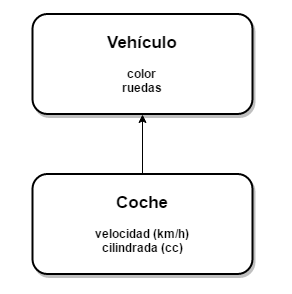

In [ ]:
class Vehiculo():

    def __init__(self, color, ruedas):
        self.color = color
        self.ruedas = ruedas

    def __str__(self):
        return "Color {}, {} ruedas".format( self.color, self.ruedas )

class Coche(Vehiculo):

    def __init__(self, color, ruedas, velocidad, cilindrada):
        self.color = color
        self.ruedas = ruedas
        self.velocidad = velocidad
        self.cilindrada = cilindrada

    def __str__(self):
        return "color {}, {} km/h, {} ruedas, {} cc".format( self.color, self.velocidad, self.ruedas, self.cilindrada )


coche = Coche("azul", 150, 4, 1200)
print(coche)

El inconveniente más evidente de ir sobreescribiendo es que tenemos que volver a escribir el código de la superclase y luego el específico de la subclase.

Para evitarnos escribir código innecesario, podemos utilizar un truco que consiste en llamar el método de la superclase y luego simplemente escribir el código de la clase:

In [ ]:
class Vehiculo():

    def __init__(self, color, ruedas):
        self.color = color
        self.ruedas = ruedas

    def __str__(self):
        return "Color {}, {} ruedas".format( self.color, self.ruedas )


class Coche(Vehiculo):

    def __init__(self, color, ruedas, velocidad, cilindrada):
        Vehiculo.__init__(self, color, ruedas)
        self.velocidad = velocidad
        self.cilindrada = cilindrada

    def __str__(self):
        return Vehiculo.__str__(self) + ", {} km/h, {} cc".format(self.velocidad, self.cilindrada)


c = Coche("azul", 4, 150, 1200)
print(c)

Como tener que determinar constantemente la superclase puede ser fastidioso, Python nos permite utilizar un acceso directo mucho más cómodo llamado ```super()```.

Hacerlo de esta forma además nos permite llamar cómodamente los métodos o atributos de la superclase sin necesidad de especificar el self, pero ojo, **sólo se aconseja utilizarlo cuando tenemos una única superclase**:

In [ ]:
class Vehiculo():

    def __init__(self, color, ruedas):
        self.color = color
        self.ruedas = ruedas

    def __str__(self):
        return "color {}, {} ruedas".format( self.color, self.ruedas )


class Coche(Vehiculo):

    def __init__(self, color, ruedas, velocidad, cilindrada):
        Vehiculo.__init__(self, color, ruedas)
        self.velocidad = velocidad
        self.cilindrada = cilindrada

    def __str__(self):
        return Vehiculo.__str__(self) + ", {} km/h, {} cc".format(self.velocidad, self.cilindrada)


c = Coche("azul", 4, 150, 1200)
print(c)

Utilizando esta nueva técnica extiende la clase Vehiculo y realiza la siguiente implementación:
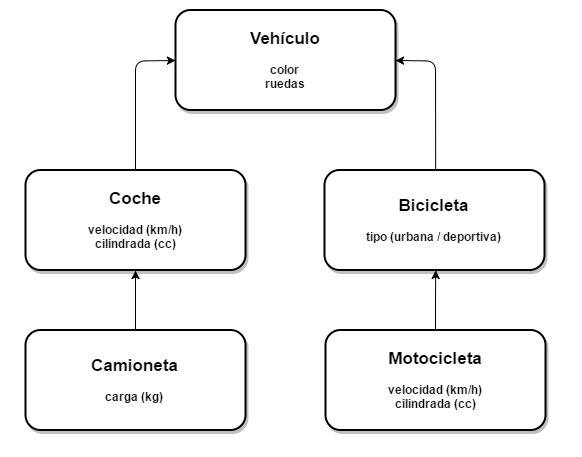

* Crea al menos un objeto de cada subclase y añádelos a una lista llamada vehiculos.
* Realiza una función llamada **catalogar()** que reciba la lista de vehiculos y los recorra mostrando el nombre de su clase y sus atributos.
* Modifica la función **catalogar()** para que reciba un argumento optativo **ruedas**, haciendo que muestre únicamente los que su número de ruedas concuerde con el valor del argumento. También debe mostrar un mensaje **"Se han encontrado {} vehículos con {} ruedas:"** únicamente si se envía el argumento ruedas. Ponla a prueba con 0, 2 y 4 ruedas como valor.

*Recordatorio: Puedes utilizar el atributo especial de clase name para recuperar el nombre de la clase de un objeto:*
```
type(objeto).__name__
```
**Solución**

#Módulo 8: Programación Funcional



##*List comprehensions*
El poder de Python va mucho más allá de lo que a primera vista podemos imaginar.

La comprensión de listas, del inglés list comprehensions, es una funcionalidad que nos permite crear listas avanzadas en una misma línea de código. Esto se ve mucho mejor en la práctica, así que a lo largo de esta lección vamos a trabajar distintos ejemplos.

### Ejemplo 1
Crear una lista con las letras de una palabra:

In [ ]:
# Método tradicional
lista = []
for letra in 'casa':
    lista.append(letra)
print(lista)

In [ ]:
# Con comprensión de listas
lista = [letra for letra in 'casa']
print(lista)

Como vemos, gracias a la comprensión de listas podemos indicar directamente cada elemento que va a formar la lista, en este caso la letra, a la vez que definimos el for:

###Ejemplo 2
Crear una lista con las potencias de 2 de los primeros 10 números:

In [ ]:
# Método tradicional
lista = []
for numero in range(0,11):
    lista.append(numero**2)
print(lista)

In [ ]:
# Con comprensión de listas
lista = [numero**2 for numero in  range(0,11)]
print(lista)

De este ejemplo podemos aprender que es posible modificar al vuelo los elementos que van a formar la lista.

###Ejemplo 3
Crear una lista con los todos los múltiples de 2 entre 0 y 10:

In [ ]:
# Método tradicional
lista = []
for numero in range(0,11):
    lista.append(numero**2)
print(lista)

In [ ]:
# Método tradicional
lista = []
for numero in range(0,11):
    if numero % 2 == 0:
        lista.append(numero)
print(lista)

In [ ]:
# Añadir los números del 0 al 10 cuando su módulo de 2 sea 0
[numero for numero in range(0,11) if numero % 2 == 0 ] 

En este caso podemos observar que incluso podemos marcar una condición justo al final para añadir o no el elemento en la lista.

###Ejemplo 4
Crear una lista de pares a partir de otra lista creada con las potencias de 2 de los primeros 10 números:

In [ ]:
# Método tradicional
lista = []
for numero in range(0,11):
    lista.append(numero**2)

pares = []   
for numero in lista:
    if numero % 2 == 0:
        pares.append(numero)

print(pares)

In [ ]:
# Con comprensión de listas
lista = [numero for numero in 
            [numero**2 for numero in range(0,11)] 
                if numero % 2 == 0 ]
print(lista)

Crear listas a partir de listas anidadas nos permite llevar la comprensión de listas al siguiente nivel y además no hay un límite.

## Funciones Lambda
Esta es una de las funcionalidades más potentes de Python a la vez que más confusas para los principiantes.

Una función anónima, como su nombre indica es una función sin nombre. ¿Es posible ejecutar una función sin referenciar un nombre? Pues sí, en Python podemos ejecutar una función sin definirla con def. De hecho son similares pero con una diferencia fundamental:
```
El contenido de una función lambda debe ser una única expresión en lugar de un bloque de acciones.
```
Y es que más allá del sentido de función que tenemos, con su nombre y sus acciones internas, una función en su sentido más trivial significa realizar algo sobre algo. Por tanto podríamos decir que, mientras las funciones anónimas lambda sirven para realizar funciones simples, las funciones definidas con def sirven para manejar tareas más extensas.

Si deconstruimos una función sencilla, podemos llegar a una función lambda. Por ejemplo tomar la siguiente función para doblar un valor:

In [ ]:
def doblar(num):
    resultado = num*2
    return resultado

doblar(2)

Vamos a simplificar el código un poco:

In [ ]:
def doblar(num):
    return num*2

#Todavía más, podemos escribirlo todo en una sola línea:
def doblar(num): return num*2

Esta notación simple es la que una función lambda intenta replicar, fijaros, vamos a convertir la función en una función anónima:

In [ ]:
lambda num: num*2

Aquí tenemos una función anónima con una entrada que recibe **num**, y una salida que devuelve **num * 2**.

Lo único que necesitamos hacer para utilizarla es guardarla en una variable y utilizarla tal como haríamos con una función normal:

In [ ]:
doblar = lambda num: num*2
doblar(2)

Gracias a la flexibilidad de Python podemos implementar infinitas funciones simples.

Por ejemplo comprobar si un número es impar:

In [ ]:
impar = lambda num: num%2 != 0
impar(5)

Darle la vuelta a una cadena utilizando slicing:

In [ ]:
revertir = lambda cadena: cadena[::-1]
revertir("Hola")

Incluso podemos enviar varios valores, por ejemplo para sumar dos números:

In [ ]:
sumar = lambda x,y: x+y
sumar(5,2)

Como pueden ver podemos realizar cualquier cosa que se nos ocurra, siempre que lo podamos definir en una sola expresión.

A continuación veremos como explotar al máximo la función lambda utilizándola en conjunto con otras funciones como filter() y map().

### Función filter()
Tal como su nombre indica filter significa filtrar, y es una de mis funciones favoritas, ya que a partir de una lista o iterador y una función condicional, es capaz de devolver una nueva colección con los elementos filtrados que cumplan la condición.

Por ejemplo, supongamos que tenemos una lista varios números y queremos filtrarla, quedándonos únicamente con los múltiples de 5...

In [ ]:
def multiple(numero):    # Primero declaramos una función condicional
    if numero % 5 == 0:  # Comprobamos si un numero es múltiple de cinco
        return True      # Sólo devolvemos True si lo es

numeros = [2, 5, 10, 23, 50, 33]

filter(multiple, numeros)

Si ejecutamos el filtro obtenemos un objeto de tipo filtro, pero podemos transformarlo en una lista fácilmente haciendo un cast (conversión):

In [ ]:
list( filter(multiple, numeros) )

Por tanto cuando utilizamos la función filter() tenemos que enviar una función condicional, pero como recordaréis, no es necesario definirla, podemos utlizar una función anónima lambda:

In [ ]:
list( filter(lambda numero: numero%5 == 0, numeros) )

Así, en una sola línea hemos definido y ejecutado el filtro utilizando una función condicional anónima y una lista de numeros.
#### Filtrando objetos
Sin embargo, más allá de filtrar listas con valores simples, el verdadero potencial de filter() sale a relucir cuando necesitamos filtrar varios objetos de una lista.

Por ejemplo, dada una lista con varias personas, nos gustaría filtrar únicamente las que son menores de edad:

In [ ]:
class Persona:

    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad

    def __str__(self):
        return "{} de {} años".format(self.nombre, self.edad)


personas = [
    Persona("Juan", 35),
    Persona("Marta", 16),
    Persona("Manuel", 78),
    Persona("Eduardo", 12)
]

Para hacerlo nos vamos a servir de una función lambda, comprobando el campo edad para cada persona:

In [ ]:
menores = filter(lambda persona: persona.edad < 18, personas)

for menor in menores:
    print(menor)

Sé que es un ejemplo sencillo, pero estoy seguro que os puede servir como base para realizar filtrados en muchos de vuestros proyectos.

###Función ```map()```
Esta función trabaja de una forma muy similar a filter(), con la diferencia que en lugar de aplicar una condición a un elemento de una lista o secuencia, aplica una función sobre todos los elementos y como resultado se devuelve un iterable de tipo map:

In [ ]:
def doblar(numero):
    return numero*2

numeros = [2, 5, 10, 23, 50, 33]

map(doblar, numeros)

Fácilmente podemos transformar este iterable en una lista:

In [ ]:
list(map(doblar, numeros))

Y podemos simplificarlo con una función lambda para substituir la llamada de una función definida:

In [ ]:
list( map(lambda x: x*2, numeros) )

La función ```map()``` se utiliza mucho junto a expresiones lambda ya que permite ahorrarnos el esfuerzo de crear bucles for.

Además se puede utilizar sobre más de un iterable con la condición que tengan la misma longitud.

Por ejemplo si queremos multiplicar los números de dos listas:

In [ ]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]

list( map(lambda x,y : x*y, a,b) )

#E incluso podemos extender la funcionalidad a tres listas o más:

c = [11, 12, 13, 14, 15]

list( map(lambda x,y,z : x*y*z, a,b,c) )

#### Mapeando objetos
Evidentemente, siempre que la utilicemos correctamente podemos mapear una serie de objetos sin ningún problema:

In [ ]:
def incrementar(p):
    p.edad += 1
    return p

personas = map(incrementar, personas)

for persona in personas:
    print(persona)

Claro que en este caso tenemos que utilizar una función definida porque no necesitamos actuar sobre la instancia, a no ser que nos tomemos la molestia de rehacer todo el objeto:

In [ ]:
personas = [
    Persona("Juan", 35),
    Persona("Marta", 16),
    Persona("Manuel", 78),
    Persona("Eduardo", 12)
]

personas = map(lambda p: Persona(p.nombre, p.edad+1), personas)

for persona in personas:
    print(persona)

## Análisis de predicados (expresiones regulares)

Una de las tareas más utilizadas en la programación es la búsqueda de subcadenas o patrones dentro de otras cadenas de texto.

Las expresiones regulares, también conocidas como ```regex``` o ```regexp```, son patrones de búsqueda definidos con una sintaxis formal. Siempre que sigamos sus reglas, podremos realizar búsquedas simples y avanzadas, que utilizadas en conjunto con otras funcionalidades, las vuelven una de las opciones más útiles e importantes de cualquier lenguaje.

Sin embargo antes de utilizarlas hay que estar seguros de lo que hacemos, de ahí aquella famosa frase de Jamie Zawinski, programador y hacker:

*Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.*

Que significa que:

*Hay gente que, cuando se enfrenta a un problema, piensa "Ya sé, usaré expresiones regulares". Ahora tienen dos problemas.*

###Métodos básicos
```re.search```: busca un patrón en otra cadena:

In [ ]:
import re

texto = "En esta cadena se encuentra una palabra mágica"

re.search('mágica', texto)

Como vemos, al realizar la búsqueda lo que nos encontramos es un objeto de tipo *Match* (encontrado), en lugar un simple *True* o *False*.

En cambio, si no se encontrase la palabra, no se devolvería nada (*None*):

In [ ]:
import re
re.search('hola', texto)

Por tanto, podemos utilizar la propia funcionalidad junto a un condicional sin ningún problema:

In [ ]:
palabra = "mágica"

encontrado = re.search(palabra,  texto)

if encontrado:
    print("Se ha encontrado la palabra:", palabra)
else:
    print("No se ha encontrado la palabra:", palabra)

Sin embargo, volviendo al objeto devuelto de tipo *Match*, éste nos ofrece algunas opciones interesantes.

In [ ]:
# Posición donde empieza la coincidencia
print( encontrado.start() ) 
# Posición donde termina la coincidencia
print( encontrado.end() )  
# Tupla con posiciones donde empieza y termina la coincidencia
print( encontrado.span() )   
# Cadena sobre la que se ha realizado la búsqueda
print( encontrado.string )   

Como vemos, en este objeto se esconde mucha más información de la que parece a simple vista, luego seguiremos hablando de ellos.

```re.match``` busca un patrón al principio de otra cadena:

In [ ]:
texto = "Hola mundo"

re.match('Hola', texto)

```re.split``` divide una cadena a partir de un patrón:

In [ ]:
texto = "Vamos a dividir esta cadena"

re.split(' ', texto)

```re.sub``` sustituye todas las coincidencias en una cadena:

In [ ]:
texto = "Hola amigo"

re.sub('amigo', 'amiga', texto)

```re.findall``` busca todas las coincidencias en una cadena:

In [ ]:
texto = "hola adios hola hola"

re.findall('hola', texto)

Aquí se nos devuelve una lista, pero podríamos aplicar la función ```len()``` para saber el número:

In [ ]:
len(re.findall('hola', texto))

### Patrones con varios valores
Si queremos comprobar varias posibilidades, podemos utilizar una tubería | a modo de OR. Generalmente pondremos el listado de alternativas entre paréntesis ()

In [ ]:
texto = "hola adios hello bye"

re.findall('hola|hello', texto)

### Patrones con sintaxis repetida
Otra posibilidad que se nos ofrece es la de buscar patrones con letras repetidas, y aquí es donde se empieza a poner interesante. Como podemos o no saber de antemano el número de repeticiones hay varias formas de definirlos.

Antes de continuar, y para aligerar todo el proceso, vamos a crear una función capaz de ejecutar varios patrones en una lista sobre un texto:

In [ ]:
texto = "hla hola hoola hooola hooooola"
def buscar(patrones, texto):
    for patron in patrones:
        print( re.findall(patron, texto) )

patrones = ['hla', 'hola', 'hoola']
buscar(patrones, texto)

* **Con meta-carácter** * 
Lo utilizaremos para definir ninguna o más repeticiones de la letra a la izquierda del meta-carácter:


In [ ]:
patrones = ['ho','ho*','ho*la','hu*la']

buscar(patrones, texto)

* **Con meta-carácter** + 
Lo utilizaremos para definir una o más repeticiones de la letra a la izquierda del meta-carácter:

In [ ]:
patrones = ['ho*', 'ho+']  

buscar(patrones, texto)

* **Con meta-carácter** ? 
Lo utilizaremos para definir una o más repeticiones de la letra a la izquierda del meta-carácter:

In [ ]:
patrones = ['ho*', 'ho+', 'ho?', 'ho?la']

buscar(patrones, texto)

* **Con número de repeticiones explícito {n}** 

Lo utilizaremos para definir 'n' repeticiones exactas de la letra a la izquierda del meta-carácter:

In [ ]:
patrones = ['ho{0}la', 'ho{1}la', 'ho{2}la']

buscar(patrones, texto)

* **Con número de repeticiones en un rango {n,m}** 

Lo utilizaremos para definir un número de repeticiones variable entre 'n' y 'm' de la letra a la izquierda del meta-carácter:

In [ ]:
patrones = ['ho{0,1}la', 'ho{1,2}la', 'ho{2,9}la']

buscar(patrones, texto)

### Conjuntos de caracteres
Cuando nos interese crear un patrón con distintos carácteres, podemos definir conjuntos entre paréntesis:

In [ ]:
texto = "hala hela hila hola hula"

patrones = ['h[ou]la', 'h[aio]la', 'h[aeiou]la']
buscar(patrones, texto)

Evidentemente los podemos utilizar con repeticiones:

In [ ]:
texto = "haala heeela hiiiila hoooooola"

patrones = ['h[ae]la', 'h[ae]*la', 'h[io]{3,9}la']
buscar(patrones, texto)

* **Exclusión en grupos [^ ]:**  \
Cuando utilizamos grupos podemos utilizar el operador de exclusión ^ para indicar una búsqueda contraria:

In [ ]:
texto = "hala hela hila hola hula"

patrones = ['h[o]la', 'h[^o]la'] 
buscar(patrones, texto)

* **Rangos [ - ]:**
Otra característica que hace ultra potentes los grupos, es la capacidad de definir rangos. Ejemplos de rangos:

* **[A-Z]**: Cualquier carácter alfabético en mayúscula (no especial ni número).
* **[a-z]**: Cualquier carácter alfabético en minúscula (no especial ni número).
* **[A-Za-z]**: Cualquier carácter alfabético en minúscula o mayúscula (no especial ni número).
* **[A-z]**: Cualquier carácter alfabético en minúscula o mayúscula (no especial ni número).
* **[0-9]**: Cualquier carácter numérico (no especial ni alfabético).
* **[a-zA-Z0-9]**: Cualquier carácter alfanumérico (no especial).
Tener en cuenta que cualquier rango puede ser excluido para conseguir el patrón contrario.

In [ ]:
texto = "hola h0la Hola mola m0la M0la"

patrones = ['h[a-z]la', 'h[0-9]la', '[A-z]{4}', '[A-Z][A-z0-9]{3}'] 
buscar(patrones, texto)

### Códigos escapados 
Si cada vez que quisiéramos definir un patrón variable tuviéramos que crear rangos, al final tendríamos expresiones regulares gigantes. Por suerte su sintaxis también acepta una serie de caracteres escapados que tienen un significo único. Algunos de los más importantes son:

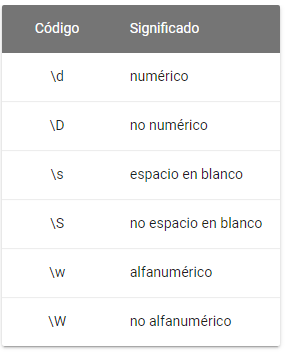

El problema que encontraremos en Python a la hora de definir código escapado, es que las cadenas no tienen en cuenta el \ a no ser que especifiquemos que son cadenas en crudo (raw), **por lo que tendremos que precedir las expresiones regulares con una 'r'**.

In [ ]:
texto = "Este curso de Python se publicó en el año 2016"

patrones = [r'\d+', r'\D+', r'\s', r'\S+', r'\w+', r'\W+'] 
buscar(patrones, texto

Por mi parte lo vamos a dejar aquí, pero el mundo de las expresiones regulares es gigantesco y daría para un curso entero. Les dejaré unas ligas de documentación para mayor información.

###Documentación

Hay docenas y docenas de códigos especiales, si queréis echar un vistazo a todos ellos podéis consultar la documentación oficial:

* https://docs.python.org/3.5/library/re.html#regular-expression-syntax

Un resumen por parte de Google Eduactión:

* https://developers.google.com/edu/python/regular-expressions

Otro resumen muy interesante sobre el tema:

* https://www.tutorialspoint.com/python/python_reg_expressions.htm

Un par de documentos muy trabajados con ejemplos básicos y avanzados:

* http://www.python-course.eu/python3_re.php
* http://www.python-course.eu/python3_re_advanced.php

#Módulo 9: Excepciones

##Errores
Los errores detienen la ejecución del programa y tienen varias causas. Para poder estudiarlos mejor vamos a provocar algunos intencionadamente.



### Errores de sintaxis
Identificados con el código **SyntaxError**, son los que podemos apreciar repasando el código, por ejemplo al dejarnos de cerrar un paréntesis:

In [ ]:
print("Hola"

###Errores de nombre
Se producen cuando el sistema interpreta que debe ejecutar alguna función, método... pero no lo encuentra definido. Devuelven el código **NameError**:

In [ ]:
pint("Hola")

La mayoría de errores sintácticos y de nombre los identifican los editores de código antes de la ejecución, pero existen otros tipos que pasan más desapercibidos.

###Errores semánticos
Estos errores son muy difíciles de identificar porque van ligados al sentido del funcionamiento y dependen de la situación. Algunas veces pueden ocurrir y otras no.

La mejor forma de prevenirlos es programando mucho y aprendiendo de tus propios fallos, la experiencia es la clave. Veamos un par de ejemplos:

**Ejemplo ```pop()``` con lista vacía**

Si intentamos sacar un elemento de una lista vacía, algo que no tiene mucho sentido, el programa dará fallo de tipo **IndexError**. Esta situación ocurre sólo durante la ejecución del programa, por lo que los editores no lo detectarán:

In [ ]:
l = []
l.pop()

Para prevenir el error deberíamos comprobar que una lista tenga como mínimo un elemento antes de intentar sacarlo, algo factible utilizando la función ```len()```:

In [ ]:
l = []

if len(l) > 0:
    l.pop()

**Ejemplo lectura de cadena y operación sin conversión a número**

Cuando leemos un valor con la función ```input()```, éste siempre se obtendrá como una cadena de caracteres. Si intentamos operarlo directamente con otros números tendremos un fallo **TypeError** que tampoco detectan los editores de código:

In [ ]:
n = input("Introduce un número: ")

print("{}/{} = {}".format(n,m,n/m))

Como ya sabemos este error se puede prevenir transformando la cadena a entero o flotante:

In [ ]:
n = float(input("Introduce un número: "))
m = 4
print("{}/{} = {}".format(n,m,n/m))

Sin embargo no siempre se puede prevenir, como cuando se introduce una cadena que no es un número:

In [ ]:
n = float(input("Introduce un número: "))
m = 4
print("{}/{} = {}".format(n,m,n/m))

Es difícil prevenir fallos que ni siquiera nos habíamos planteado que podían existir. Por suerte para esas situaciones existen las excepciones.

##Tipos de Excepciones
Las excepciones son bloques de código que nos permiten continuar con la ejecución de un programa pese a que ocurra un error.

Siguiendo con el ejemplo de la lección anterior, teníamos el caso en que leíamos un número por teclado, pero el usuario no introducía un número.

### Bloques try - except
Para prevenir el fallo debemos poner el código propenso a errores en un bloque try y luego encadenar un bloque except para tratar la situación excepcional mostrando que ha ocurrido un fallo:

In [ ]:
try:
    n = float(input("Introduce un número: "))
    m = 4
    print("{}/{} = {}".format(n,m,n/m))
except:
    print("Ha ocurrido un error, introduce bien el número")

Como vemos esta forma nos permite controlar situaciones excepcionales que generalmente darían error y en su lugar mostrar un mensaje o ejecutar una pieza de código alternativo.

Podemos aprovechar las excepciones para forzar al usuario a introducir un número haciendo uso de un bucle ```while```, repitiendo la lectura por teclado hasta que lo haga bien y entonces romper el bucle con un ```break```:

In [ ]:
while(True):
    try:
        n = float(input("Introduce un número: "))
        m = 4
        print("{}/{} = {}".format(n,m,n/m))
        break  # Importante romper la iteración si todo ha salido bien
    except:
        print("Ha ocurrido un error, introduce bien el número")

###Bloque else
Es posible encadenar un bloque ```else``` después del ```except``` para comprobar el caso en que **todo funcione correctamente** (no se ejecuta la excepción).

El bloque ```else``` es un buen momento para romper la iteración con ```break``` si todo funciona correctamente:

In [ ]:
while(True):
    try:
        n = float(input("Introduce un número: "))
        m = 4
        print("{}/{} = {}".format(n,m,n/m))
    except:
        print("Ha ocurrido un error, introduce bien el número")
    else:
        print("Todo ha funcionado correctamente")
        break  # Importante romper la iteración si todo ha salido bien

###Bloque finally
Por último es posible utilizar un bloque ```finally``` que se ejecute al final del código, **ocurra o no ocurra un error**:

In [ ]:
while(True):
    try:
        n = float(input("Introduce un número: "))
        m = 4
        print("{}/{} = {}".format(n,m,n/m))
    except:
        print("Ha ocurrido un error, introduce bien el número")
    else:
        print("Todo ha funcionado correctamente")
        break  # Importante romper la iteración si todo ha salido bien
    finally:
        print("Fin de la iteración") # Siempre se ejecuta

## Excepciones múltiples
En una misma pieza de código pueden ocurrir muchos errores distintos y quizá nos interese actuar de forma diferente en cada caso.

Para esas situaciones algo que podemos hacer es asignar una excepción a una variable.

De esta forma es posible analizar el tipo de error que sucede gracias a su identificador:

In [ ]:
try:
    n = input("Introduce un número: ")  # no transformamos a número
    5/n
except Exception as e:  # guardamos la excepción como una variable e
    print("Ha ocurrido un error =>", type(e).__name__)

Cada error tiene un identificador único que curiosamente se corresponde con su tipo de dato. Aprovechándonos de eso podemos mostrar la clase del error utilizando la sintaxis:

In [ ]:
print( type(e) )

Es similar a conseguir el tipo (o clase) de cualquier otra variable o valor literal:

In [ ]:
print(type(1))
print(type(3.14))
print(type([]))
print(type(()))
print(type({}))

Como vemos siempre nos indica eso de "class" delante. Eso es porque en Python todo son clases, pero hablaremos de este concepto más adelante. Lo importante ahora es que podemos mostrar solo el nombre del tipo de dato (la clase) consultando su propiedas especial name de la siguiente forma:

In [ ]:
print( type(e).__name__)
print(type(1).__name__)
print(type(3.14).__name__)
print(type([]).__name__)
print(type(()).__name__)
print(type({}).__name__)

Gracias a los identificadores de errores podemos crear múltiples comprobaciones, siempre que dejemos en último lugar la excepción por defecto *Excepcion* que engloba cualquier tipo de error (si la pusiéramos al principio las demas excepciones nunca se ejecutarían):

In [ ]:
try:
    n = float(input("Introduce un número divisor: "))
    5/n
except TypeError:
    print("No se puede dividir el número entre una cadena")
except ValueError:
    print("Debes introducir una cadena que sea un número")
except ZeroDivisionError:
    print("No se puede dividir por cero, prueba otro número")
except Exception as e:
    print("Ha ocurrido un error no previsto", type(e).__name__ )

## Invocación de Excepciones
En algunas ocasiones quizá nos interesa llamar un error manualmente, ya que un print común no es muy elegante:

In [ ]:
def mi_funcion(algo=None):
    if algo is None:
        print("Error! No se permite un valor nulo (con un print)")

mi_funcion()

### Instrucciones raise
Gracias a *raise* podemos lanzar un error manual pasándole el identificador. Luego simplemente podemos añadir un except para tratar esta *excepción* que hemos lanzado:

In [ ]:
def mi_funcion(algo=None):
    try:
        if algo is None:
            raise ValueError("Error! No se permite un valor nulo")
    except ValueError:
        print("Error! No se permite un valor nulo (desde la excepción)")

mi_funcion()

##Ejercicio 3
Localiza el error en el siguiente bloque de código. Crea una excepción para evitar que el programa se bloquee y además explica en un mensaje al usuario la causa y/o solución:

In [ ]:
resultado = 10/0

##Ejercicio 4
Localiza el error en el siguiente bloque de código. Crea una excepción para evitar que el programa se bloquee y además explica en un mensaje al usuario la causa y/o solución:

In [ ]:
lista = [1, 2, 3, 4, 5]
lista[10]

##Ejercicio 5
Localiza el error en el siguiente bloque de código. Crea una excepción para evitar que el programa se bloquee y además explica en un mensaje al usuario la causa y/o solución:

In [ ]:
colores = { 'rojo':'red', 'verde':'green', 'negro':'black' } 
colores['blanco']

##Ejercicio 6
Localiza el error en el siguiente bloque de código. Crea una excepción para evitar que el programa se bloquee y además explica en un mensaje al usuario la causa y/o solución:

In [ ]:
resultado = 15 + "20"

##Ejercicio 7
Realiza una función llamada **agregar_una_vez(lista, el)** que reciba una lista y un elemento. La función debe añadir el elemento al final de la lista con la condición de no repetir ningún elemento. Además si este elemento ya se encuentra en la lista se debe invocar un error de tipo *ValueError* que debes capturar y mostrar este mensaje en su lugar:
```
Error: Imposible añadir elementos duplicados => [elemento].
```
Cuando tengas la función intenta añadir los siguiente valores a la lista **10, -2, "Hola"** y luego muestra su contenido.

*Sugerencia: Puedes utilizar la sintaxis "elemento in lista"*

In [ ]:
elementos = [1, 5, -2]

# Completa el ejercicio aquí

# Módulo 10: *Debugging and Profiling*



## IPython Magics

IPython es un shell interactivo que añade funcionalidades extra al modo interactivo incluido con Python, como resaltado de líneas y errores mediante colores, una sintaxis adicional para el shell, autocompletado mediante tabulador de variables, módulos y atributos; entre otras funcionalidades.

Google Colaboratory es un ambiente IPython.

Los ambientes IPython y Colab soportan comandos *magic* llamados **mágicos** o **magics** (ver [IPython - Magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html))) 

En agregación al Python *normal*, estos comandos pueden ser muy útiles cuando se interactúa directamente con la máquina virtual o el *Notebook*.


### Celdas mágicas
Las celdas mágicas definen un modo de ejecución para toda una celda y llevan el prefijo ``` %% ```

Por ejemplo: \

*  **%%bash** or **%%sh**: La celda funciona como si fuera un **terminal**
* **%%html**: La celda funciona con lenguaje **html**
* **%%javascript**: La celda funciona con lenguaje **javascript**
* **%%R**: La celda funciona con lenguaje **R**

In [ ]:
%%sh
echo "This is a shell script!"
# List all running VM processes.
ps -ef
echo "Done"

In [ ]:
# Embed custom HTML directly into a cell's output.
%%html
<marquee>HTML rocks</marquee>

###Líneas Mágicas

También se pueden usar lineas mágicas las cuales pueden ser insertadas en cualquier parte de la celda y llevan el prefijo ```%```.

Ejemplos:

*   **%timeit** - Muestra el tiempo requerido de ejecución de una línea de código
*   **%time** - Muestra el tiempo requerido de ejecución de una línea de código
*   **%cd** - cambia el directorio de trabajo actual
*   **%pdb** - invoca el *debugger* interactivo de Python o el modo de depuración interactivo
* **%lsmagic** - lista todas las líneas mágicas y funciones de celdas mágicas disponibles

Por ejemplo, si se requiere saber cuánto tardar una línea específica en ser ejecutada se puede usar el comando ```%timeit```

In [ ]:
%timeit sum(range(100))

Notar que dado que esta operación es rápida `%timeit` hace un número de grande de repeticiones. Para comandos más lentos, `%timeit` ajustará automáticamente y hará menos repeticiones:

In [ ]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

Algunas veces repetir una operación no es la mejor opción. Por ejemplo, si tenemos una lista que necesitamos ordenar, se puede mal llevar con un operación repetitiva.
Ordenar una lista pre-ordenada es más rápido que ordenar una lista no ordenada, por lo que la repetición puede sesgar el resultado:

In [ ]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

Para lo anterior ``%time`` puede ser una mejor opción. Es mejor opción para comandos que tardan más en ejecutarse. Veamos cuanto tarda un ordenamiento de una lista no ordenada y una lista pre-ordenada:

In [ ]:
import random
L = [random.random() for i in range(100000)]
print("sorting an unsorted list:")
%time L.sort()

In [ ]:
print("sorting an already sorted list:")
%time L.sort()

Notemos que tan rápido una lista preordenada se ordena de nuevo, pero también notemos que tanto toma cronometrar con ``%time`` versus ``%timeit``, incluso para listas preordenadas.

Esto es el resultado del hecho de que ``%timeit``hace cosas más inteligentes  para prevenir llamadas de sistama que interieran con tomar el tiempo.

Por ejemplo, previente de limpoiar objetos no usados de Python (conocidos como *garbage colletction*) que puede afectar el cronometraje.
Por  esta razón, los resultados de ``%timeit``, son usualmente más rápidos que los de ``%time``.

Tanto para ``%time`` como para ``%timeit``, usar el ``%%`` permite medir el timpo de scripts multilínea.

In [ ]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

Para mayor información usar ``%time?`` o ``%timeit``.

In [ ]:
%%time
n = 1000000
list1 = [i for i in range(n)]
list2 = [i for i in range(int(n/2))]

### Líneas mágicas customizables
Se pueden definir de la siguiente manera en la línea/celda:

In [ ]:
#Esta celda imprime el contenido de la línea y de la celda
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def mymagic(line_content, cell_content=None):
  print('line_content="%s" cell_content="%s"' % (line_content, cell_content))

In [ ]:
%mymagic ¡Jose Jorge!

In [ ]:
%%mymagic pregunta simple
¡Jose Jorge!
¿Cómo estás?

##Fomularios

Se pueden simplificar celdas ocultando su código y mostrando un formulario en su lugar


**Nota:** Se puede mostrar el código dando doble click en el formulario que se verá del lado derecho

In [ ]:
#@title Ejecútame

# Contenido oculto de celda.
print("Dar doble click para ver el contenido.")


In [ ]:
# Ejemplo de formulario donde se tienne que añadir variables, o se pueden ver en agragar "code snippets"
#@title Ejemplo de formulario
#@markdown Especifique algunos datos de prueba y ejecute esta celda

string_type = 'Cadena_de_valores_de_prueba' #@param {type: "string"}
slider_value = 150  #@param {type: "slider", min: 100, max: 200}
number = 1981  #@param {type: "number"}
date = '2014-06-06'  #@param {type: "date"}
pick_me = "b"  #@param ['a', 'b', 'c']
#@markdown ---
print("Datos ingresados:")
print(string_type, slider_value, number, date, pick_me)

## Depuración interactiva con ```%pdb```

Un ejemplo de una herramienta de IPython que se puede utilizar es la depuración interactiva dentro de un ambiente IPython como Colab.

Por ejemplo, usando `%pdb`, se puede lanzar automáticamente el depurador sobre excepciones para analizar a profundidad celdas.

Algunas comandos de depuración son :

Descripción | Comandos
---|---
**h**(elp) | Muestra comandos disponibles
**p**(rint) `x` | Muestra el contendio del objeto `x`
**w**(here) | Muestra la posición actual del puntero 
**q**(uit) | Salir del depurador

In [ ]:
# Acción requerida:
#Ejecute la celda, imprima los contenidos de la variable a, b y salga del depurador.
%pdb on
a = 67069 / 47 - 0x5a
b = a - 0x539
c = a / b  # Lanzará una excepción.

##Line *profiling* y optimización

En el proceso de codificación y creación de flujos de procesamiento de datos, hay varias alternativas que se pueden hacer entre varias implementaciones. En las etapas de desarrollo preocuparse por eso puede ser contraproducente. Como dijo Donald Knuth "Debemos olvidarnos de pequeñas eficiencias, digamos que el 97% del tiempo: la optimización prematura es la raíz de todo el mal."

Pero una vez que se tiene el código funcionando, puede ser útil profundizar un poco en la eficiencia. A veces es útil revisar el tiempo de ejecución de un cierto comando o conjunto de comandos; otras veces es útil es útil profundizar en un proceso multilinea donde exista un cuello de botella donde se realicen operaciones complicadas. IPython provee acceso a un amplio catálogo de funcionalidad para ete tipo de mediciones y perfilamento (*profiling*) de código. Discutiremos los siguientes comandos mágicos:

- ``%prun``: Ejecutar código con el perfilador 
- ``%lprun``: Ejecutar línea por línea con el perfilador 
- ``%memit``: Medir el uso de memoria de un sentencia
- ``%mprun``: Ejecutar código línea por línead con el perfilador de memoria

Los últimos cuatro comandos no están incluídos con IPython, se necesitarán conseguir las extensiones ``line_profiler`` y ``memory_profiler``. 


### Perfilando códigos completos ``%prun``

Un programa es hecho de varias sentencias, y algunas veces cronometrar estas sentencias en todo el contexto es mejor que cronometrarlas individualmente.
Python contiene un perfilador de código (que se puede leer en la documentacón de Python), pero IPython ofrece una manera más conveniente  para usar este perfilador, en la forma de la función mágica ``%prun``.

Como ejemplo, definiremos una función que haga algunos cálculos:

In [ ]:
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

Ahora llamaremos `%prun` para ver los resultados perfilados:

In [ ]:
%prun sum_of_lists(1000000)

En el *Notebook* la salida será impresa en una página aparte y muestra lo siguiente:

```
        14 function calls in 0.704 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.635    0.127    0.635    0.127 <ipython-input-2-f105717832a2>:4(<listcomp>)
        1    0.033    0.033    0.694    0.694 <ipython-input-2-f105717832a2>:1(sum_of_lists)
        5    0.026    0.005    0.026    0.005 {built-in method builtins.sum}
        1    0.010    0.010    0.704    0.704 <string>:1(<module>)
        1    0.000    0.000    0.704    0.704 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

El resultado es una tabla que indica, el orden del tiempo total de cada llamada de la función, donde la ejecución toma más tiempo. En este caso, el bonche de tiempo de ejecución es en la lista de comprensión dentro de ``sum_of_lists``.
Desde este punto de vista podemos comenzar a pensar en qué cambios deberemos hacer para mejorar el rendimiento en el algoritmo.

Para más información sobre ``%prun``, así como de sus opciones disponibles usar la función de ayuda de IPython (es decir, poner 
For more information on ``%prun``, as well as its available options, use the IPython help functionality (i.e., type ``%prun?`` at the IPython prompt).

En el *Notebook* la salida será impresa en una página aparte y muestra lo siguiente:

```
        14 function calls in 0.704 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        5    0.635    0.127    0.635    0.127 <ipython-input-2-f105717832a2>:4(<listcomp>)
        1    0.033    0.033    0.694    0.694 <ipython-input-2-f105717832a2>:1(sum_of_lists)
        5    0.026    0.005    0.026    0.005 {built-in method builtins.sum}
        1    0.010    0.010    0.704    0.704 <string>:1(<module>)
        1    0.000    0.000    0.704    0.704 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
```

El resultado es una tabla que indica, el orden del tiempo total de cada llamada de la función, donde la ejecución toma más tiempo. En este caso, el bonche de tiempo de ejecución es en la lista de comprensión dentro de ``sum_of_lists``.
Desde este punto de vista podemos comenzar a pensar en qué cambios deberemos hacer para mejorar el rendimiento en el algoritmo.

Para más información sobre ``%prun``, así como de sus opciones disponibles usar la función de ayuda de IPython (es decir, poner ``%prun?`` en la celda de IPython).

In [ ]:
%prun?

### Linea-por-Linea perfilamiento con ``%lprun``

La función de perfilamiento de ``%prun`` es útil, pero algunas veces es más conveniente tener un reporte de perfilamiento por línea.

Esta no está construida en Pyhton o IPyhton, pero existe un paquete de ``line_profiler`` disponible para instala que puede hacer esto.

Comenzar utilizando la herramiento de paquetes de Python, ``pip``, para instalar el paquete ``line_profiler``:

```
$ pip install line_profiler
```

En consecuencia, se puede utilizar IPython para cargar la extensión IPython, que se tiene como parte de este paquete:


In [ ]:
pip install pandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
%load_ext line_profiler

Ahora el comando ``%lprun`` hará una pefilamiento línea por línea de cualquier función, en este caso, se necesitará especificar qué función estaremos interesados en perfilar:

In [ ]:
%lprun -f sum_of_lists sum_of_lists(5000)

La salida es la siguiente:
```
Timer unit: 1e-06 s

Total time: 0.006336 s
File: <ipython-input-2-f105717832a2>
Function: sum_of_lists at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def sum_of_lists(N):
     2         1          2.0      2.0      0.0      total = 0
     3         6          7.0      1.2      0.1      for i in range(5):
     4         5       6163.0   1232.6     97.3          L = [j ^ (j >> i) for j in range(N)]
     5         5        163.0     32.6      2.6          total += sum(L)
     6         1          1.0      1.0      0.0      return total
```

Se indica el resumen de los resultados, el tiempo es reporatado en microsegundos y podemos ver en qué parte del programa se está invirtiendo más tiempo.

En este punto, podemos ver en qué parte del código debemos poner atención para optimizar.

Si se requiere mayor información usar el comando: ``%lprun?``.

### Pefilamiento de uso de memoria: ``%memit`` and ``%mprun``

Otro aspecto del perfilamiento es el monto de memoria que usa una operación.
Este se puede valuar con otra extensión de IPython, el ``memory_profiler``.

Deberemos instalar la extensión:
```
!pip install memory_profiler
```
Después hay que cargar la extensión:

In [ ]:
!pip install memory_profiler

In [ ]:
%load_ext memory_profiler

La extensión de perfilador de memoria contiene dos funciones mágicas útiles: 
``%memit`` magic (que calcula una medición de memoria equivalente a``%timeit``) y la función ``%mprun`` (que contiene una medición similar a ``%lprun``).
La función ``%memit`` se puede usar de manera sencilla como:

In [ ]:
%memit sum_of_lists(1000000)

Vemos que esta función usa acerca de 250 MB de memoria.

Para una descripción línea por línea de memora, podemos usar `%mprun` magic. Desafortunadamente, este comando mágico funciona sólo para funciones definidos en módulos separados en lugar de en el mismo *Notebook*, por lo que usaremos el comando ``%%file`` para crear el archivo **mprum_demo.py**, que contiene la función **sum_of_lists**, con un adición que hará el perfilamiento dememoria más claro:


In [ ]:
%%file mprun_demo.py
def sum_of_lists(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
        del L # remove reference to L
    return total

Importaremos la nueva versión de esta función y ejecutaremos el perfilamiento de memoria por línea:

In [ ]:
from mprun_demo import sum_of_lists
%mprun -f sum_of_lists sum_of_lists(100)

El resultado impreso en la ayuda, da un resumen del uso de la función y es algo así:
```
Filename: ./mprun_demo.py

Line #    Mem usage    Increment   Line Contents
================================================
     4     71.9 MiB      0.0 MiB           L = [j ^ (j >> i) for j in range(N)]


Filename: ./mprun_demo.py

Line #    Mem usage    Increment   Line Contents
================================================
     1     39.0 MiB      0.0 MiB   def sum_of_lists(N):
     2     39.0 MiB      0.0 MiB       total = 0
     3     46.5 MiB      7.5 MiB       for i in range(5):
     4     71.9 MiB     25.4 MiB           L = [j ^ (j >> i) for j in range(N)]
     5     71.9 MiB      0.0 MiB           total += sum(L)
     6     46.5 MiB    -25.4 MiB           del L # remove reference to L
     7     39.1 MiB     -7.4 MiB       return total
```

Aquíe la columna ``Increment``muetra cuanto afecta cada línea en el total de memoria, observar que cuando se crean y borra la lista ``L`` se añaden otros 25 MB de usao de memria.

Para mayor información hacer referencia a `%memit?`

# Módulo 11: Packages and Virtual Environments

##Conectar Google Colab a *Local Runtime* (sin Anaconda)








### Instalar Python en ambiente Local vía Pip

1. Entrar a https://www.python.org/downloads/windows/
2. Bajar la versión que se requiera (3.7.6) : *Windows x86-64 executable installer* ó *Windows x86 executable installer* 
![Pantalla de inicio](https://phoenixnap.com/kb/wp-content/uploads/2019/04/python-setup.png)
Las opciones recomendadas son IDLE y PIP. Es probable que para versiones previas no tengan esas opciones.
3. En el siguiente cuadro de diálogo se decidirá si **Disable path length limit.** Escoger esta opción permitirá pasar el límite de 260 caracteres. Esto habilitará los nombres de ruta largos: ![alt text](https://phoenixnap.com/kb/wp-content/uploads/2019/04/python-setup-completed.png)  
 Aplicar esta opción no afectará ninguna configuración de otros sistemas, al contrario resolverá algunos temas de longitud de nombre que se puedan haber desarrollado en el Python de Linux.



### Verificar instalación de Python en Windows
1. Navegar al directorio de instalación **C:\Users\<<Username>>\AppData\Local\Programs\Python\Python37**
2. Dar click en **python.exe**
3. Al ejecutarse tiene que mostrar lo siguiente:
![](https://phoenixnap.com/kb/wp-content/uploads/2019/04/verify-python-install-1.png)



### Verificación de instalación de *pip*

1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando ``pip -V``. Si pip está instalado correctamente se verá lo siguiente: 
![](https://phoenixnap.com/kb/wp-content/uploads/2019/04/verify-pip.png)
Si no se ha instalado se mostrará lo siguiente:
````
’pip’ is not recognized as an internal or external command,
Operable program or batch file.
````

Si esto pasa ver el artículo: [Instalar pip](https://phoenixnap.com/kb/install-pip-windows)

###Instalar ambientes virtuales: **virtualenv** *Opcional*

Hasta ahora ya tienen Python local, y tienen Pip para gestionar paquetería. Ahora, necesitan un último software *virtualnv*.
Virtualnv ayuda a crear ambientes virtuales aislados para los proyectos de Python.

¿Por qué usar ambientes virtuales?

La paquetería de Python está instalada de manera *ancha* por default. En consecuencia, cuando un proyecto tiene una paquetería modificada, cambia **TODOS** los proyectos de Python. Si se quiere evitar esto, y tener ambientes virtuales separados para cada proyecto esta es la solución más sencilla.

Para instalar virtualnv:

1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando ``pip install virtualenv``.

En cuanto se complete, **virtualnv** está instalado en el sistema.

#### Cómo crear un ambiente virtual en Python
Para crear un entorno virtual con Python 3, simplemente ejecutamos el comando ``virtualenv`` de la siguiente manera:
```
virtualenv env --python=python3
```
La ejecución de comandos anteriormente explicados crean el directorio env/ con la siguiente estructura:
```
env/
  bin/
  include/
  lib/
    site-packages/
```
En el directorio ``bin/`` se encuentran los ejecutables necesarios para interactuar con el entorno virtual. En el directorio ``include/`` se encuentran algunos archivos de cabecera de C (cuya extensión es *.h) necesarios para compilar algunas librerías de Python.

Finalmente, en el directorio ``lib/`` se encuentra una copia de la instalación de Python así como un directorio llamado ``site-packages/`` en donde se almacenan los paquetes Python instalados en el entorno virtual.

#### Cómo activar un entorno virtual de Python con *virtualenv*
Para activar un entorno virtual de Python, se ejecuta el script activate de virtualenv instalado en el directorio ``bin/``:
```
$ cd env
$ source bin/activate
(env)$
```
El prompt de la terminal indica que el entorno virtual ``mi_proyecto`` está activado. Ya es posible utilizar los paquetes Python instalados en el entorno virtual así como instalar paquetes adicionales.

#### Cómo desactivar un entorno virtual de Python con *virtualenv*
Para desactivar un entorno virtual, porque se necesita trabajar en otro diferente, se ejecuta el comando ``deactivate`` de virtualenv. No es necesario ir al directorio del entorno virtual para realizar esta operación: 
```
(env)$ deactivate
$
```
El prompt de la terminal indica que el entorno virtual ha sido desactivado con éxito.

#### Cómo instalar paquetes en un entorno virtual de Python
Después de activarlo, lo único que resta es instalar los paquetes que sean necesarios usando el instalador de paquetes *pip*.

*Al momento de crear un entorno virtual, la utilidad *virtualenv* instala de manera automática el ejecutable pip.*

Por ejemplo, para instalar Django se ejecuta el siguiente comando:
```
(env)$ pip install Django
```
Notese que el prompt de la terminal indica que el entorno virtual ``env`` está activado de antemano.

#### ¿En qué directorio ubico el código fuente de mi proyecto?
La ubicación del código fuente del proyecto en el que se está trabajando no es importante. Puede ser colocado inclusive dentro del directorio del entorno virtual. Una vez que el entorno virtual está activado, todas las librerías de Python que se instalen solo podrán ser usadas al activar ese entorno virtual específico.


### Instalar Jupyter con pip

1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando `pip install notebook``.
4. Para ejecutar el notebook, ingresar el siguiente comando en cmd: ``jupyter notebook	``

### Conectar Google Colab a Entorno local o *Local Runtime*
[link text](https://)
#### Instalar y habilitar la extensión de jupyter ``jupyter_http_over_ws`` (se habilita sólo una vez)`
1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando 
````
pip install --upgrade jupyter_http_over_ws>=0.0.7 
jupyter serverextension enable --py jupyter_http_over_ws
````

#### Iniciar el servidor local (jupyter) y autenticarse
1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando 
````
jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \  --port=8888 \ --NotebookApp.port_retries=0
````
4. Una vez que el servidor se ha iniciado imprimirá un URL usado para autenticación. Hay que copiar esta dirección, ejemplo:
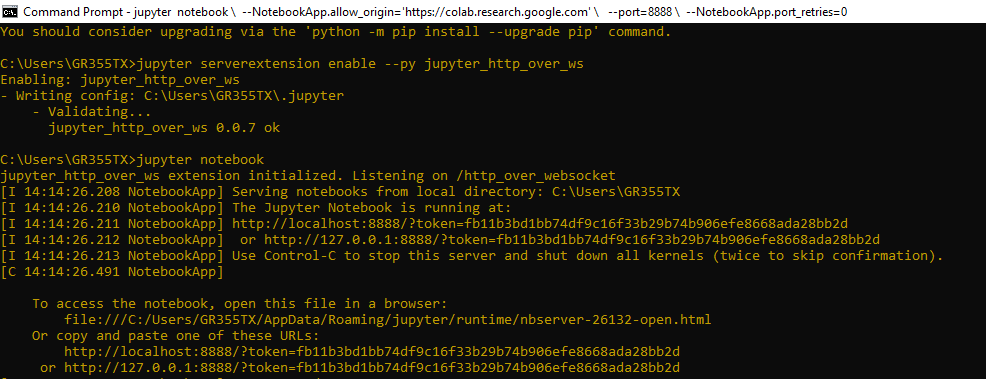

### Conectarse al entorno local desde el Google Colaboratory
1. Dar click en el botón "Conectar" o "Connect".
2. Seleccionar "Connect to local runtime" o "Conectarse a un entorno de ejecución local":
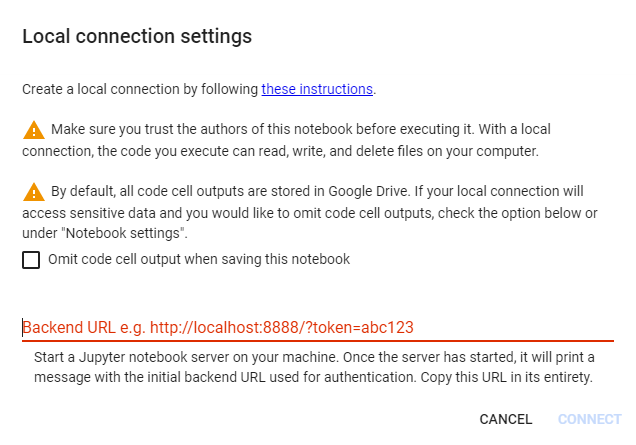
3. Ingresa el código copiado en el bloque anterior, el que lanza jupyter cuando se conecta localmente.
4. Dar click en "Connect" o "Conectar", justo después de haber pegado el token del paso anterior.


##Conectar Google Colab a *Local Runtime* (con Anaconda)

###Instalar Python en ambiente Local con Anaconda
Para la instalación de Python 3.7 se recomienda descargar de:

https://www.anaconda.com/distribution/ (Anaconda con Spyder y Jupyter, el cual incluye Python 3.7 - por el momento).

Anaconda es un conjunto de varias aplicaciones incluyendo Spyder y Jupyter. Spyder es una aplicación tipo IDE que corre Python 3.7. Además de correr Python, también existe un IDE para correr el lenguaje R. Si se prefiere tener preinstalados los paquetes, Jupyter es un sistema de bloc de notas como Google Colab (aquí), que incluye varios paquetes como Numpy y Matplotlib.

###Instalación de paqueterías con comando ``conda``

Al igual que con ``pip`` el comando ``conda`` sirve para instalar paquetería de Python, el comando siempre es: 
```
conda install ...
```
donde ```...``` es la paquetería a instalar.

### Instalar Jupyter con ``conda``
Si se instaló Anaconda completo es muy probable que ya se haya instalado Jupyter, o bien se puede hacer con el *conda pack manager*. La distribución de la instalación de miniconda incluye una instalación mínima de Python e instalación de conda, si se tiene esa se puede instalar el notebook con:
```
conda install -c conda-forge notebook
```

### Conectar Google Colab a Entorno local o *Local Runtime*
[link text](https://)
#### Instalar y habilitar la extensión de jupyter ``jupyter_http_over_ws`` (se habilita sólo una vez)`
1. Abrir el **cmd**, en menú de windows **inicio** o **start** y escribir **cmd**
2. Abrir el programa **Command Prompt**
3. Ingresar el comando 
````
pip install --upgrade jupyter_http_over_ws>=0.0.7 
jupyter serverextension enable --py jupyter_http_over_ws
````

#### Iniciar el servidor local (jupyter) y autenticarse
1. Abrir el **Anaconda Prompt**, en menú de windows **inicio** o **start** y escribir **Anaconda Prompt**
2. Abrir el programa **Anaconda Prompt**
3. Ingresar el comando 
````
jupyter notebook \ --NotebookApp.allow_origin='https://colab.research.google.com' \  --port=8888 \ --NotebookApp.port_retries=0
````
4. Una vez que el servidor se ha iniciado imprimirá un URL usado para autenticación. Hay que copiar esta dirección, ejemplo:
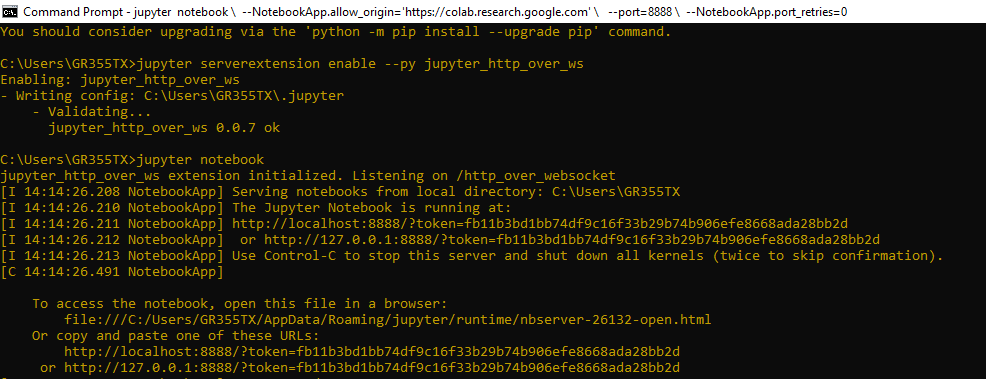

### Conectarse al entorno local desde el Google Colaboratory
1. Dar click en el botón "Conectar" o "Connect".
2. Seleccionar "Connect to local runtime" o "Conectarse a un entorno de ejecución local":
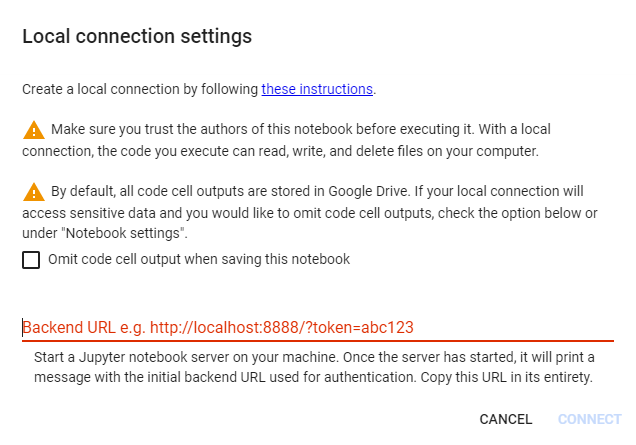
3. Ingresa el código copiado en el bloque anterior, el que lanza jupyter cuando se conecta localmente.
4. Dar click en "Connect" o "Conectar", justo después de haber pegado el token del paso anterior.